In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Prepare the datasets
train_dataset = datasets.FashionMNIST(root='../dataset', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.FashionMNIST(root='../dataset', train=False, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:03<00:00, 7626086.51it/s] 


Extracting ../dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../dataset/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 132969.51it/s]


Extracting ../dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../dataset/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2494221.56it/s]


Extracting ../dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../dataset/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11170345.06it/s]


Extracting ../dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../dataset/FashionMNIST/raw



In [4]:
# Hyperparameters
batch_size = 64
num_epochs = 5
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
# CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [7]:
# Instantiate the model, move it to the device (GPU/CPU)
model = CNN().to(device)

In [8]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
# Training Loop
for epoch in range(num_epochs):
    print('*' * 10)
    print(f'Epoch {epoch+1}')
    running_loss = 0.0
    running_acc = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        running_acc += (predicted == labels).sum().item() / labels.size(0)

        if i % 300 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {running_loss/(i+1):.6f}, Accuracy: {running_acc/(i+1):.6f}')

    print(f'Finish Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.6f}, Accuracy: {running_acc/len(train_loader):.6f}')


**********
Epoch 1
Epoch: 1/5, Loss: 2.313378, Accuracy: 0.046875
Epoch: 1/5, Loss: 0.661182, Accuracy: 0.753011
Epoch: 1/5, Loss: 0.533592, Accuracy: 0.801867
Epoch: 1/5, Loss: 0.466985, Accuracy: 0.826478
Finish Epoch 1, Loss: 0.460759, Accuracy: 0.828708
**********
Epoch 2
Epoch: 2/5, Loss: 0.313766, Accuracy: 0.843750
Epoch: 2/5, Loss: 0.302618, Accuracy: 0.889431
Epoch: 2/5, Loss: 0.289327, Accuracy: 0.892991
Epoch: 2/5, Loss: 0.281243, Accuracy: 0.896452
Finish Epoch 2, Loss: 0.280765, Accuracy: 0.896289
**********
Epoch 3
Epoch: 3/5, Loss: 0.303772, Accuracy: 0.843750
Epoch: 3/5, Loss: 0.236899, Accuracy: 0.911337
Epoch: 3/5, Loss: 0.234466, Accuracy: 0.911788
Epoch: 3/5, Loss: 0.230285, Accuracy: 0.914123
Finish Epoch 3, Loss: 0.230466, Accuracy: 0.914146
**********
Epoch 4
Epoch: 4/5, Loss: 0.207164, Accuracy: 0.890625
Epoch: 4/5, Loss: 0.198904, Accuracy: 0.926703
Epoch: 4/5, Loss: 0.198351, Accuracy: 0.926373
Epoch: 4/5, Loss: 0.198319, Accuracy: 0.926315
Finish Epoch 4, Los

In [10]:
model.eval()  # Set the model to evaluation mode
test_loss = 0
correct = 0
with torch.no_grad():  # No need to track the gradients
    for images, labels in test_loader:

        outputs = model(images)
        test_loss += criterion(outputs, labels).item()  # Sum up batch loss
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
      f'({100. * correct / len(test_loader.dataset):.2f}%)')


Test set: Average loss: 0.0037, Accuracy: 9142/10000 (91.42%)


In [15]:
import torchvision

In [23]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


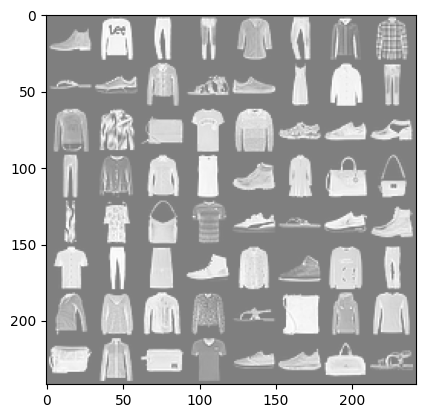

GroundTruth:  Ankle boot Pullover Trouser Trouser Shirt Trouser  Coat Shirt Sandal Sneaker  Coat Sandal Sneaker Dress  Coat Trouser Pullover  Coat   Bag T-shirt/top Pullover Sandal Sneaker Ankle boot Trouser  Coat Shirt T-shirt/top Ankle boot Dress   Bag   Bag Dress Dress   Bag T-shirt/top Sneaker Sandal Sneaker Ankle boot Shirt Trouser Dress Sneaker Shirt Sneaker Pullover Trouser Pullover Pullover  Coat  Coat Sandal   Bag Pullover Pullover   Bag  Coat   Bag T-shirt/top Sneaker Sneaker   Bag Sandal
Predicted:  Ankle boot Pullover Trouser Trouser Shirt Trouser  Coat Shirt Sandal Sneaker  Coat Sandal Sneaker Dress  Coat Trouser Pullover  Coat   Bag T-shirt/top Pullover Sandal Sneaker Sandal Trouser Pullover Shirt T-shirt/top Ankle boot Dress   Bag   Bag Dress Dress   Bag T-shirt/top Sneaker Sandal Sneaker Ankle boot Shirt Trouser Shirt Ankle boot Shirt Sneaker Pullover Trouser Shirt Shirt  Coat  Coat Sandal   Bag Pullover Pullover   Bag  Coat   Bag T-shirt/top Sneaker Sneaker   Bag Sanda

In [27]:
# Assuming these are the classes in your dataset
#classes = ['class1', 'class2', 'class3', 'class4']  # Update this line with your actual class names

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to('cpu'), labels.to('cpu')

# Predict images
outputs = model(images)

# Print predicted labels
_, predicted = torch.max(outputs, 1)

# Determine the number of images in the batch
batch_size = images.size(0)

# Print images
imshow(torchvision.utils.make_grid(images.cpu()))

# Adjust the print statements to dynamically use the batch size
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(batch_size)))


In [28]:
torch.save(model.state_dict(),'./cnn.pth')